In [1]:
# Test Algorithm for graph generation

In [281]:
# Import Packages
import igraph as ig
import numpy as np
import pandas as pd

In [392]:
# Define n and P
# Each node is given a type which is based on the combination of attrbutes
node_numbers    = [50, 30, 40, 30]
total_Nodes     = sum(node_numbers)
node_type       = [0, 1, 2, 3]
node_attribute1 = [1, 1, 2, 2]
node_attribute2 = [1, 2, 1, 2]

#prob_matrix  = np.zeros([4,4])

# Define P element by element for test.  For simulations this will be better thought out to include priors

#prob_matrix[0][0] = 1; prob_matrix[0][1] = 0.0; prob_matrix[0][2] = 0.0; prob_matrix[0][3] = 0.0
#prob_matrix[1][0] = 0.0; prob_matrix[1][1] = 1; prob_matrix[1][2] = 0.0; prob_matrix[1][3] = 0.0
#prob_matrix[2][0] = 0.0; prob_matrix[2][1] = 0.0; prob_matrix[2][2] = 1; prob_matrix[2][3] = 0.0
#prob_matrix[3][0] = 0.0; prob_matrix[3][1] = 0.0; prob_matrix[3][2] = 0.0; prob_matrix[3][3] = 1

In [401]:
# Function for our proposed symmetrized probability matrix
def makeProbMatrix(A, B, C, D):
    return [[A, B, C, D],[B, A, D, C],[C, D, A, B],[D, C, B, A]]

prob_matrix =  makeProbMatrix(.2,.01,.01,.005)

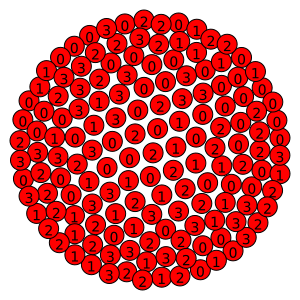

In [405]:
# Initializing nodes in network

g = ig.Graph(directed = False)
for k in range(len(node_numbers)):
    g.add_vertices(n = node_numbers[k])
    if k == 0:
        for m in range(0, node_numbers[k]):
            g.vs[m]['type'] = node_type[k]
            g.vs[m]['race'] = node_attribute1[k]
            g.vs[m]['age']  = node_attribute2[k]
    else:
        for m in range(sum(node_numbers[:k]), sum(node_numbers[:k+1])):
            g.vs[m]['type'] = node_type[k]
            g.vs[m]['race'] = node_attribute1[k]
            g.vs[m]['age'] = node_attribute2[k]

# Draw network
ig.plot(g , bbox=(0,0,300,300), vertex_label=g.vs['type'])

In [403]:
# Algorithm 1 for adding edges to the plot
for node in range(total_Nodes):
    for other_node in range(total_Nodes):
        if node == other_node: continue
        if (np.random.uniform()) < prob_matrix[g.vs[node]['type']][g.vs[other_node]['type']]:
            g.add_edge(node,other_node)

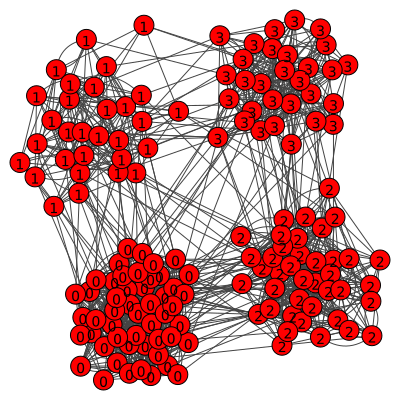

In [404]:
ig.plot(g , bbox=(0,0,400,400), vertex_label=g.vs['type'])